In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pl

In [19]:
df=pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.shape


(1338, 7)

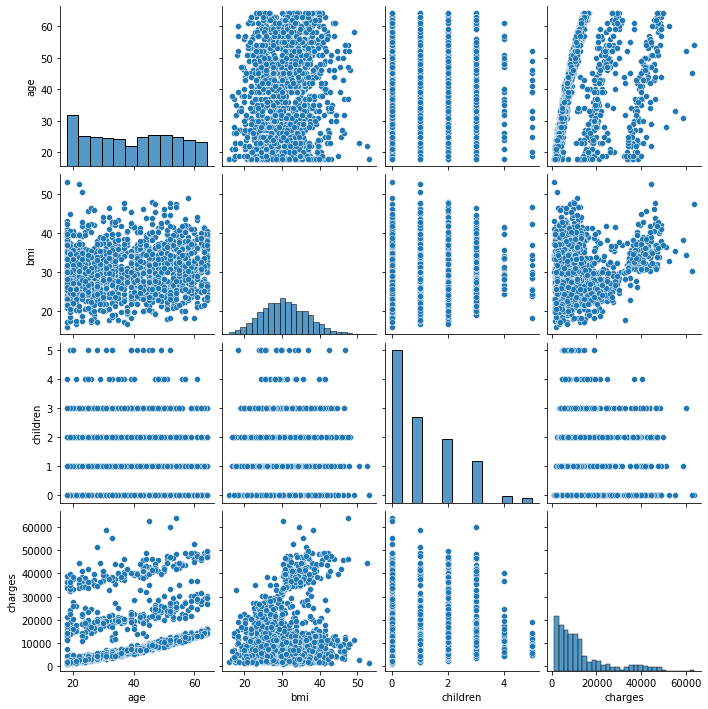

In [13]:
sns.pairplot(df)

In [14]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [15]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [16]:
df1=df.replace({"female":0,"male":1,"yes":1,"no":0,"southwest":1,"southeast":2,"northwest":3,"northeast":4})
df1

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830
1334,18,0,31.920,0,0,4,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,1,2007.94500


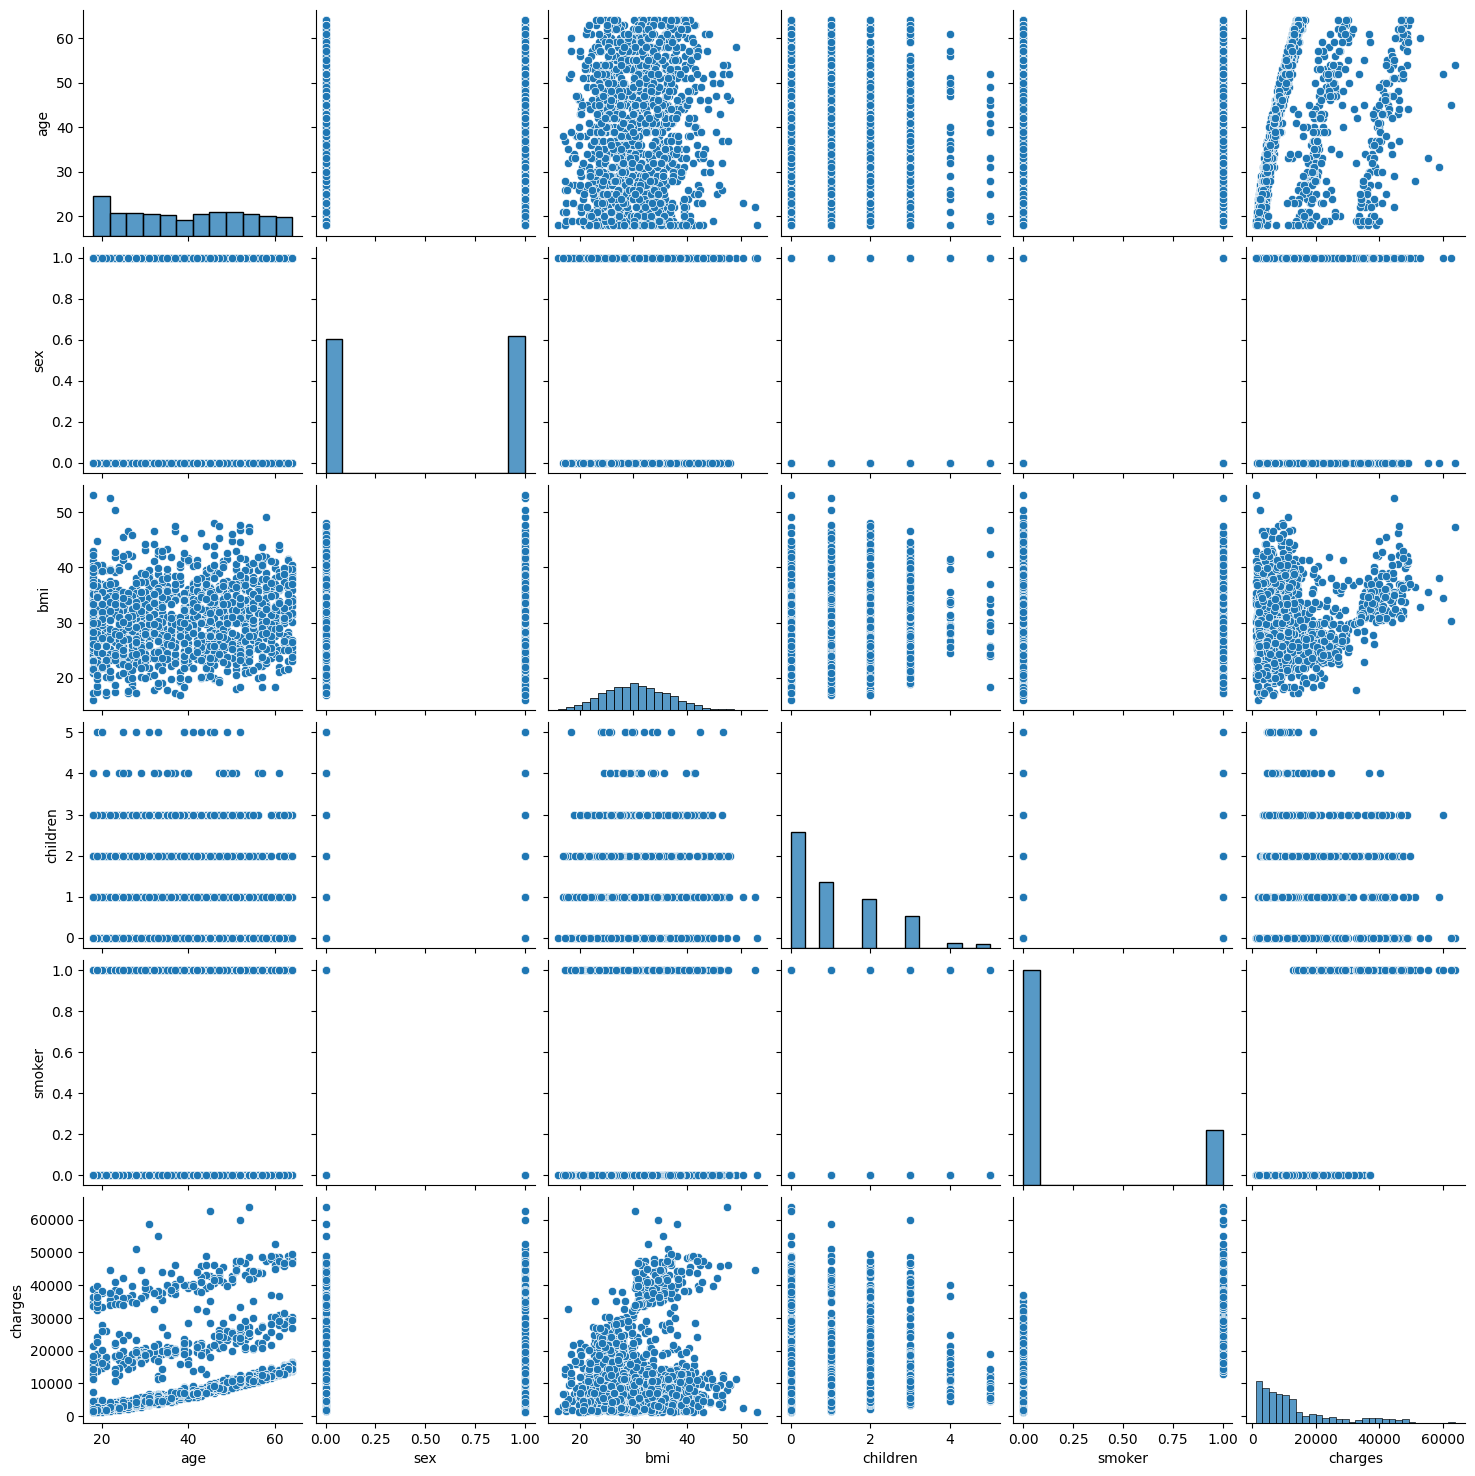

In [21]:
sns.pairplot(df1)

In [17]:
df1.corr()


,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,-0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,-0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.002181,0.787251
region,-0.002127,-0.004588,-0.157566,-0.016569,0.002181,1.000000,0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,0.006208,1.000000


In [7]:
X=np.array(df1["smoker"])
X

array([1, 0, 0, ..., 0, 0, 1])

In [6]:
Y=np.array(df1["charges"])
Y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

print("X train=",X_train.shape)
print("Y train=",y_train.shape)
print("X test=",X_test.shape)
print("Y test=",y_test.shape)

X train= (1003,)
Y train= (1003,)
X test= (335,)
Y test= (335,)


In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
re_X_train=np.array(X_train.reshape(-1,1))
re_y_train=np.array(y_train.reshape(-1,1))
re_X_test=np.array(X_test.reshape(-1,1))
re_y_test=np.array(y_test.reshape(-1,1))


In [11]:
re_y_train

array([[ 2352.96845],
       [ 4340.4409 ],
       [ 9391.346  ],
       ...,
       [11931.12525],
       [46113.511  ],
       [10214.636  ]])

In [12]:
reg = LinearRegression().fit(re_X_train, re_y_train)
LinearRegression()


LinearRegression()

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred=reg.predict(re_X_test)
y_pred

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 53840720.190662704
Mean Absolute Error: 5636.665780821425
R-squared: 0.6431816984345173


In [ ]:
#user Input
smoker = input("Does the user smoke? (yes/no): ").strip().lower()
X = 1 if smoker == 'yes' else 0

input_data['smoker'] = X


input_data = input_data[X_train.columns]

# Predict
predicted_charge = reg.predict(input_data)
print(f"Predicted charge: {predicted_charge[0]:.2f}")
#user Input
smoker = input("Does the user smoke? (yes/no): ").strip().lower()
if smoker == 'yes':
    X=1
else:
    X=0


# Predict
predicted_charge = reg.predict([[X]])
print("Predicted charge: ",predicted_charge)

Does the user smoke? (yes/no): yes


NameError: name 'input_data' is not defined

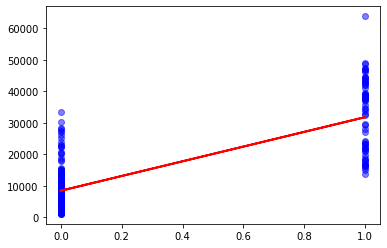

In [33]:
pl.scatter(re_X_test, re_y_test, color="blue", alpha=0.5)
pl.plot(re_X_test, y_pred, color="red", linewidth=2, label="Predicted line")
pl.show()

In [18]:
X_multi = df1.drop("charges", axis=1)
y_multi = df1["charges"]

X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

multi_reg = LinearRegression()
multi_reg.fit(X_train, y_train)


y_pred_multi = multi_reg.predict(X_test)

mse_multi = mean_squared_error(y_test, y_pred_multi)
mae_multi = mean_absolute_error(y_test, y_pred_multi)
r2_multi = r2_score(y_test, y_pred_multi)
print("For Testing Data Set:")
print("MSE:", mse_multi)
print("MAE:", mae_multi)
print("R²:", r2_multi)

For Testing Data Set:
MSE: 33635210.431178406
MAE: 4186.508898366434
R²: 0.7833463107364539
